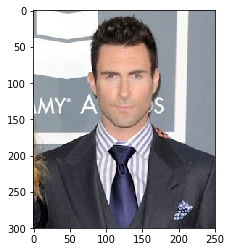

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage import data
from skimage import color
from sklearn.cluster import KMeans
import pandas as pd

#read image
img=data.imread('face_d2.jpg')

plt.imshow(img)
plt.show()


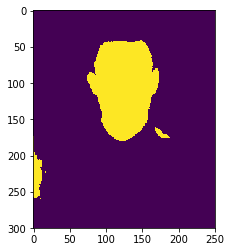

In [18]:
#convert rgb to lab and reshape the ab information so that they can be used in kmeans
img_lab=color.rgb2lab(img)
ab=img_lab[:,:,1:3]
nrows,ncols=ab.shape[0:2]
ab=ab.reshape(nrows*ncols,2)

#kmeans cluster
img_kmeans=KMeans(n_clusters=2,random_state=1).fit(ab)

#reshape the label so that we can show the label-based image
img_seg=img_kmeans.labels_.reshape(nrows,ncols)

plt.imshow(img_seg)
plt.show()

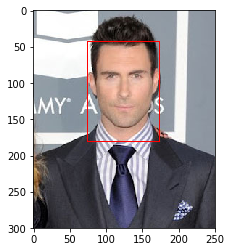

In [19]:
#prepare output label as data frame to draw detection rectangular over face
output=pd.DataFrame(img_kmeans.labels_.reshape(nrows,ncols))

output['rowsum']=output.sum(axis=1)
output.loc['colsum'] = output.apply(lambda x: x.sum())
output.loc['colsum','rowsum']=0

#find the maximum of label 1 based on rows and columns; Also their index respectively
idmax_column=output.loc['colsum'].argmax()
idmax_row=output['rowsum'].argmax()
max_column=output.loc['colsum'].max()
max_row=output['rowsum'].max()

#find the boundary of face over columns
index_first=True
lower_col=0
while(index_first):
    if(output.loc[89,lower_col]==0):
        lower_col+=1
    else:
        index_first=False
upper_col=lower_col+max_row

#find the boundary of face over rows
index_first=True
lower_row=0
while(index_first):
    if(output.loc[lower_row,119]==0):
        lower_row+=1
    else:
        index_first=False
upper_row=lower_row+max_column

#draw the output with red detection rectangular
result=img
for row_index in range(result.shape[0]):
    for col_index in range(result.shape[1]):
        if row_index==lower_row or row_index==upper_row:
            if col_index>=lower_col and col_index<=upper_col:
                result[row_index][col_index][0]=255
                result[row_index][col_index][1]=0
                result[row_index][col_index][2]=0
        if col_index==lower_col or col_index==upper_col:
            if row_index>=lower_row and row_index<=upper_row:
                result[row_index][col_index][0]=255
                result[row_index][col_index][1]=0
                result[row_index][col_index][2]=0
                
plt.imshow(result)
plt.show()